In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('Data/dataset-case-iqvia.csv', sep=',')

df.head()

,week_dt,dsupp_id,product_id,region_nm,units_qty,product_attr_1,product_attr_2,product_attr_3
0,2024-03-31,6,233.0,Norte,6.0,B,C,B24
1,2024-03-01,6,233.0,Norte,1.0,B,C,B24
2,2024-08-01,6,233.0,Norte,1.0,B,C,B24
3,2024-09-29,6,233.0,Norte,1.0,B,C,B24
4,2024-05-01,6,233.0,Norte,3.0,B,C,B24


---

# EDA

## Dicionário de variáveis:
- week_dt: data correspondente ao primeiro dia da semana.
- dsupp_id: código de identificação do distribuidor do produto.
- product_id: código de identificação do produto.
- region_nm: macrorregião do ibge cuja loja, na qual o produto foi vendido, está situada.
- units_qty: quantidade de unidades vendidas na semana.
- product_attr_1, product_attr_2 e product_attr_3: atributos específicos dos produtos.

In [3]:
# Convertendo para datetime
df['week_dt'] = pd.to_datetime(df['week_dt'])

df = df.sort_values('week_dt', ascending=True).reset_index(drop=True)

df['week_dt']

0        2022-11-01
1        2022-11-01
2        2022-11-01
3        2022-11-01
4        2022-11-01
            ...    
120585   2024-10-27
120586   2024-10-27
120587   2024-10-27
120588   2024-10-27
120589   2024-10-27
Name: week_dt, Length: 120590, dtype: datetime64[ns]

In [4]:
print("="*50 + " Checagem Padrão " + "="*50)
print("Valores Nulos:")
for column in df.columns:
    if df[column].isnull().sum() == 0:
        print(f"The column {column} is ok!")
    else:
        print(f"The column {column} have {df[column].isnull().sum()} NaN values")
        
print("="*50 + " Representação dos valores nulos " + "="*50)
print(df.isnull().sum() / len(df))
print("="*100)
print("Linhas Duplicadas:")
if df.duplicated().sum() > 0:
    print("Found rows duplicated! Removing...")
    df.drop_duplicates(inplace=True)
else:
    print("Not Found rows duplicated")
print("="*50 + " Descrição Estatística " + "="*50)
df.describe()

================================================== Checagem Padrão ==================================================
Valores Nulos:
The column week_dt is ok!
The column dsupp_id is ok!
The column product_id have 1 NaN values
The column region_nm have 1 NaN values
The column units_qty have 1 NaN values
The column product_attr_1 have 1 NaN values
The column product_attr_2 have 1 NaN values
The column product_attr_3 have 1 NaN values
================================================== Representação dos valores nulos ==================================================
week_dt           0.000000
dsupp_id          0.000000
product_id        0.000008
region_nm         0.000008
units_qty         0.000008
product_attr_1    0.000008
product_attr_2    0.000008
product_attr_3    0.000008
dtype: float64
Linhas Duplicadas:
Not Found rows duplicated
================================================== Descrição Estatística ==================================================


,week_dt,dsupp_id,product_id,units_qty
count,120590,120590.000000,120589.000000,120589.000000
mean,2023-11-03 12:20:06.547806976,9.639265,204.745972,51.720213
min,2022-11-01 00:00:00,0.000000,1.000000,0.010000
25%,2023-05-01 00:00:00,6.000000,117.000000,2.000000
50%,2023-11-12 00:00:00,6.000000,214.000000,6.000000
75%,2024-04-28 00:00:00,11.000000,296.000000,23.000000
max,2024-10-27 00:00:00,27.000000,390.000000,24074.000000
std,NaN,6.682240,109.512936,284.258688


- Importante: Por representar menos de 0.0001% de dados nulos, podemos introduzir a remoção desse valores, não afetará a perfomance do modelo. Se a representação fosse >= 1% podemos decidir a imputação com `KNNImputer` ou utilizar a `média` das colunas. 

In [5]:
df.dropna(inplace=True)

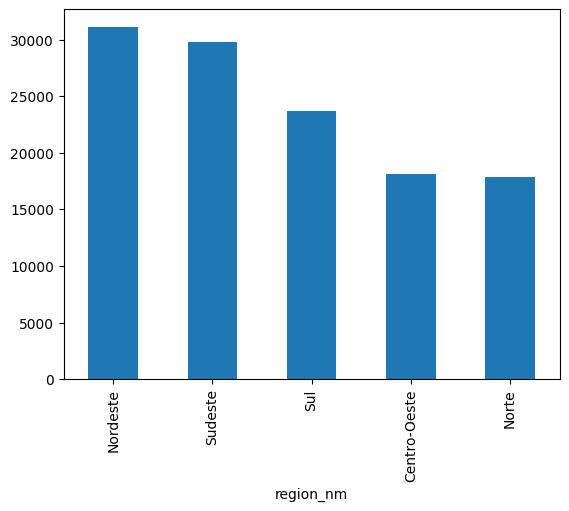

In [6]:
df['region_nm'].value_counts().plot(kind='bar')
plt.show()

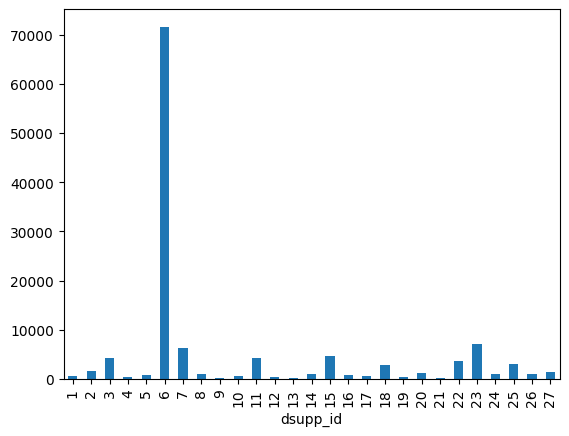

In [7]:
df['dsupp_id'].value_counts().sort_index().plot(kind='bar')
plt.show()

<Axes: >

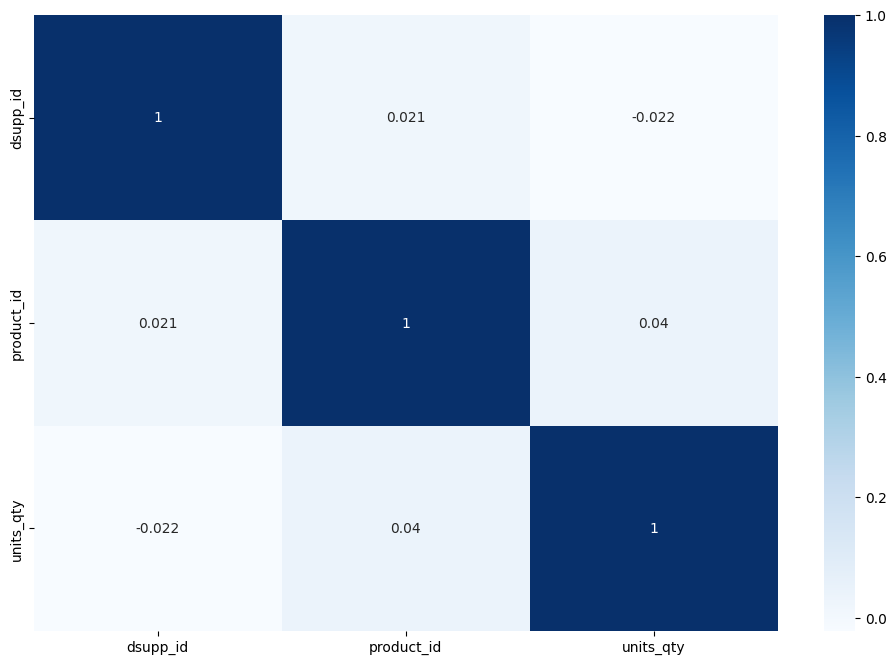

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

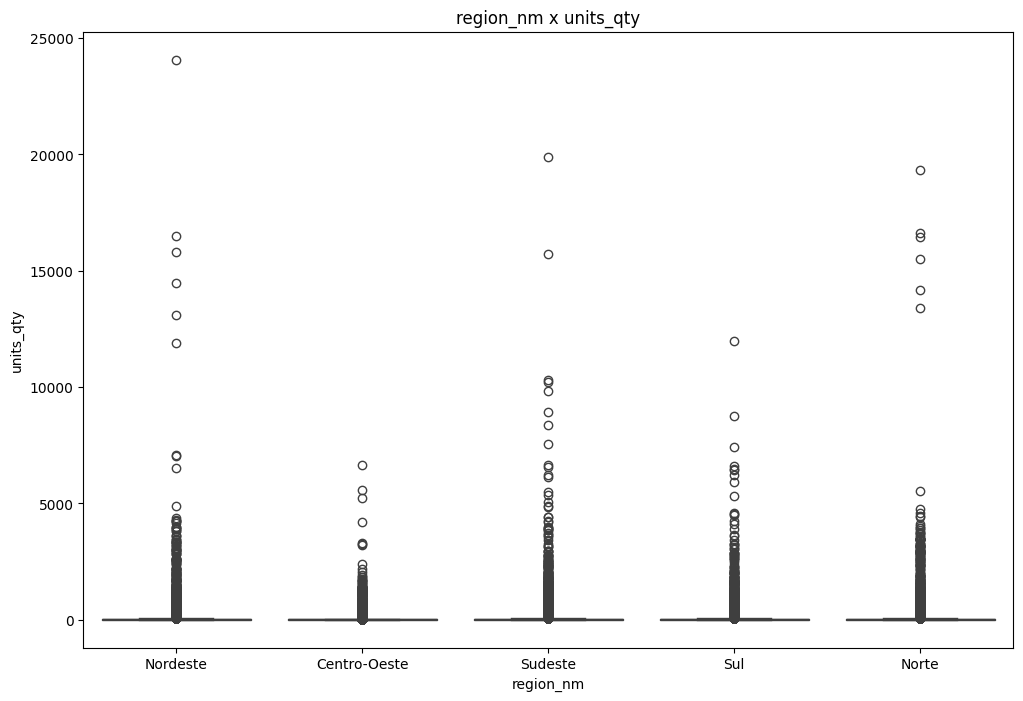

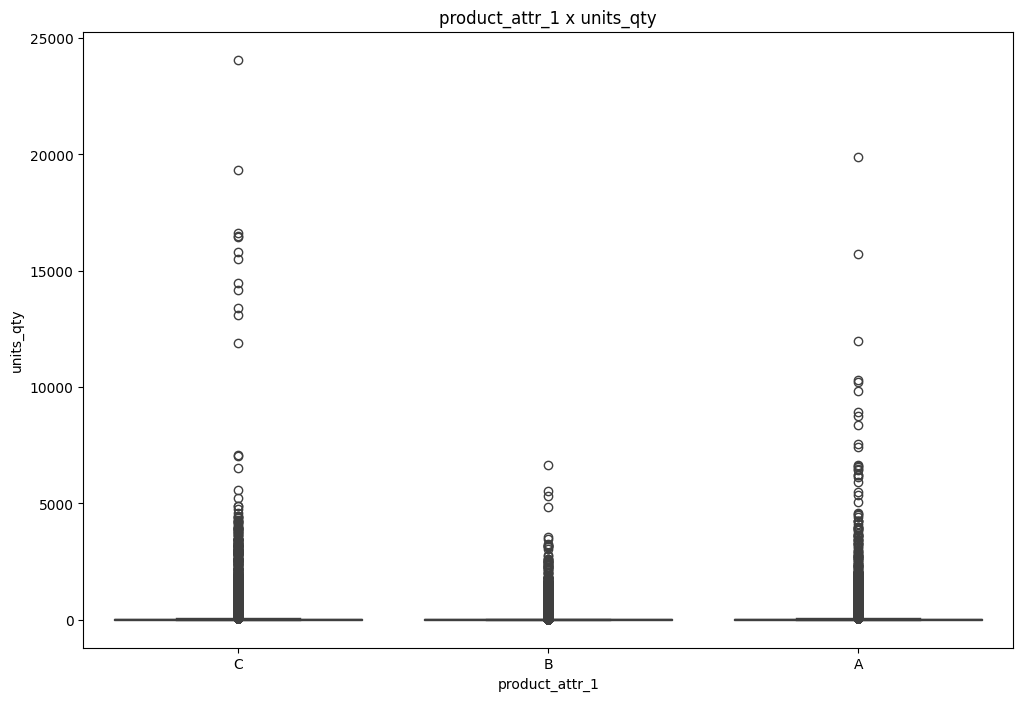

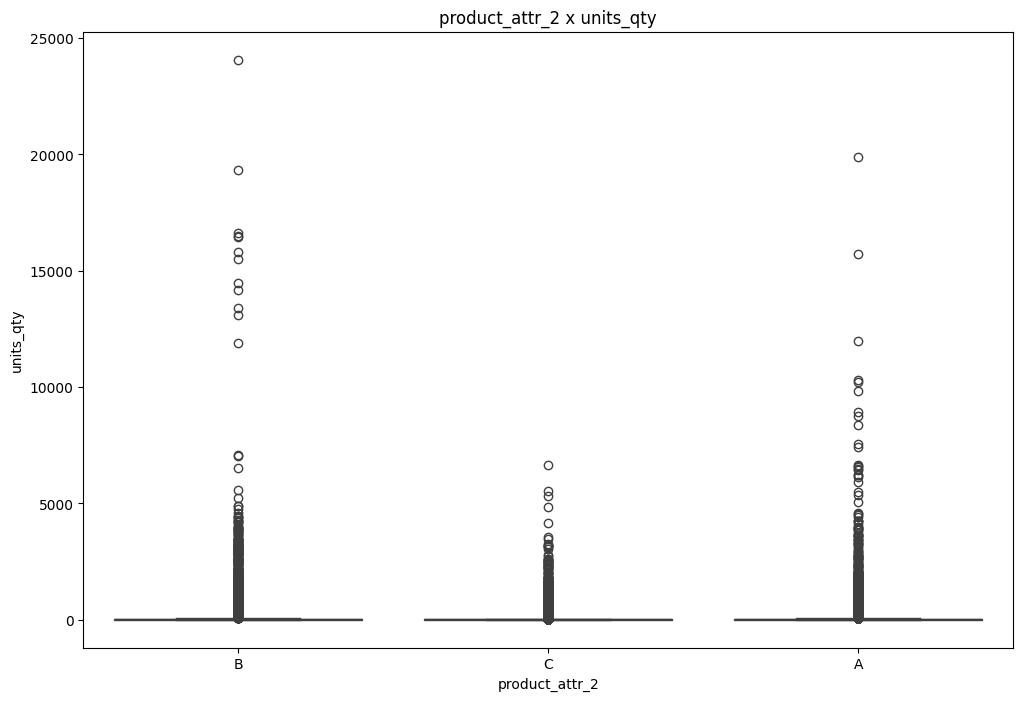

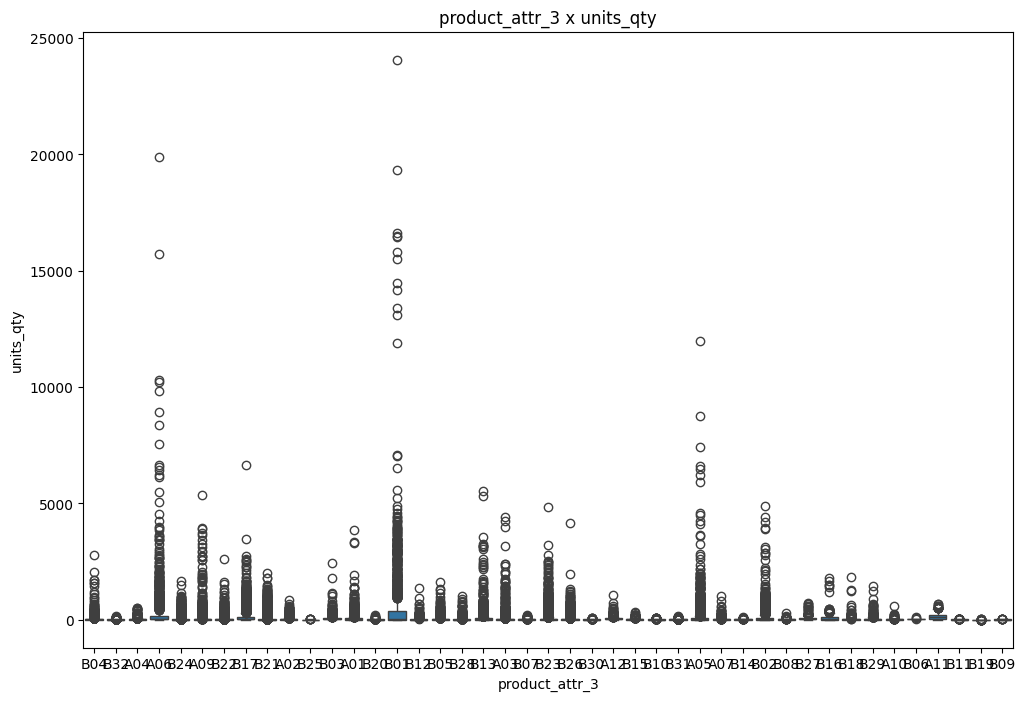

In [9]:
columns = ['region_nm', 'product_attr_1', 'product_attr_2', 'product_attr_3']

for column in columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=column, y='units_qty', data=df)
    plt.title(f"{column} x units_qty")
    plt.show()

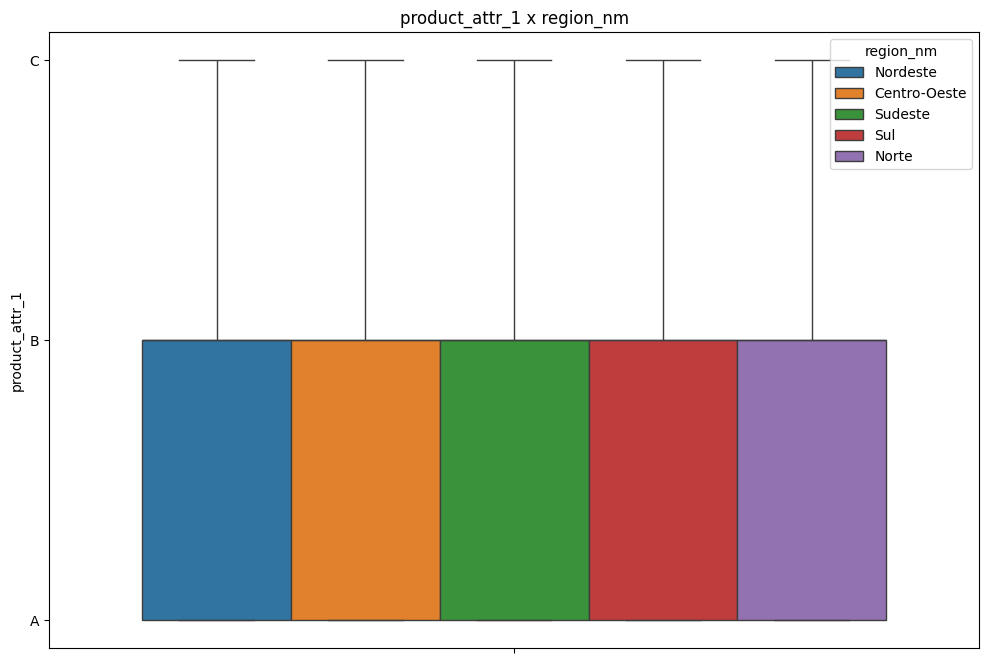

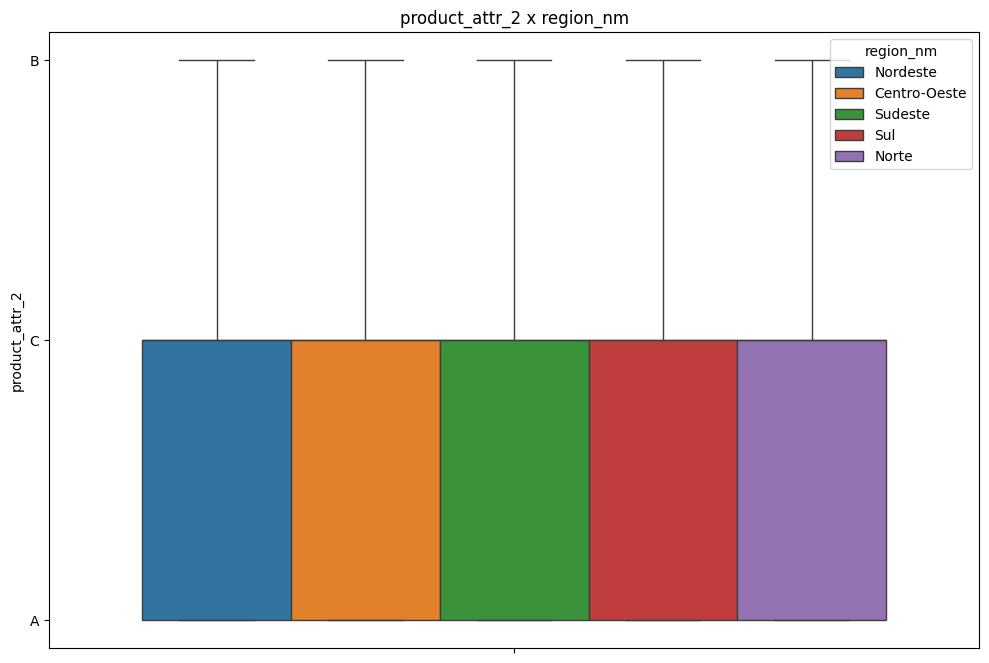

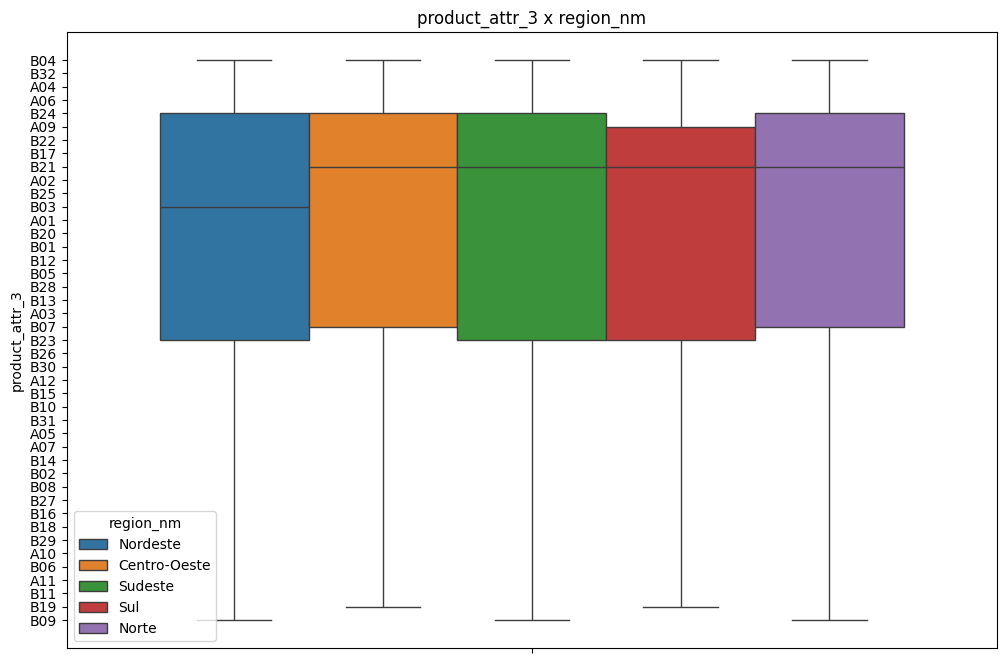

In [10]:
columns = ['product_attr_1', 'product_attr_2', 'product_attr_3']

for column in columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(y=column, hue='region_nm', data=df)
    plt.title(f"{column} x region_nm")
    plt.show()

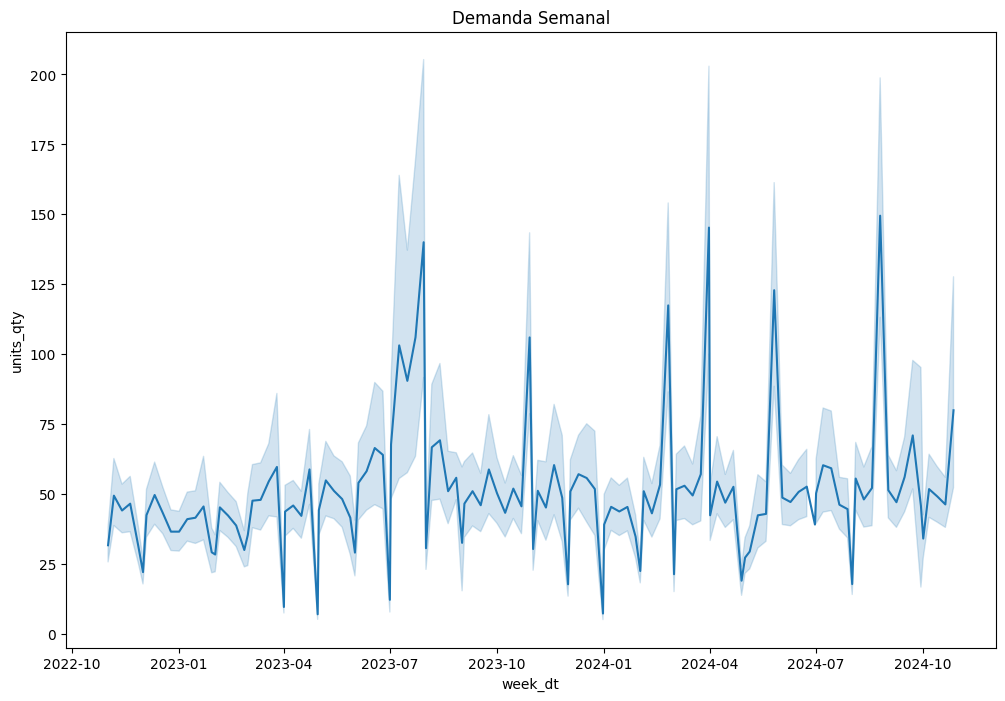

In [11]:
plt.figure(figsize=(12,8))
sns.lineplot(x='week_dt', y='units_qty', data=df)
plt.title("Demanda Semanal")
plt.show()

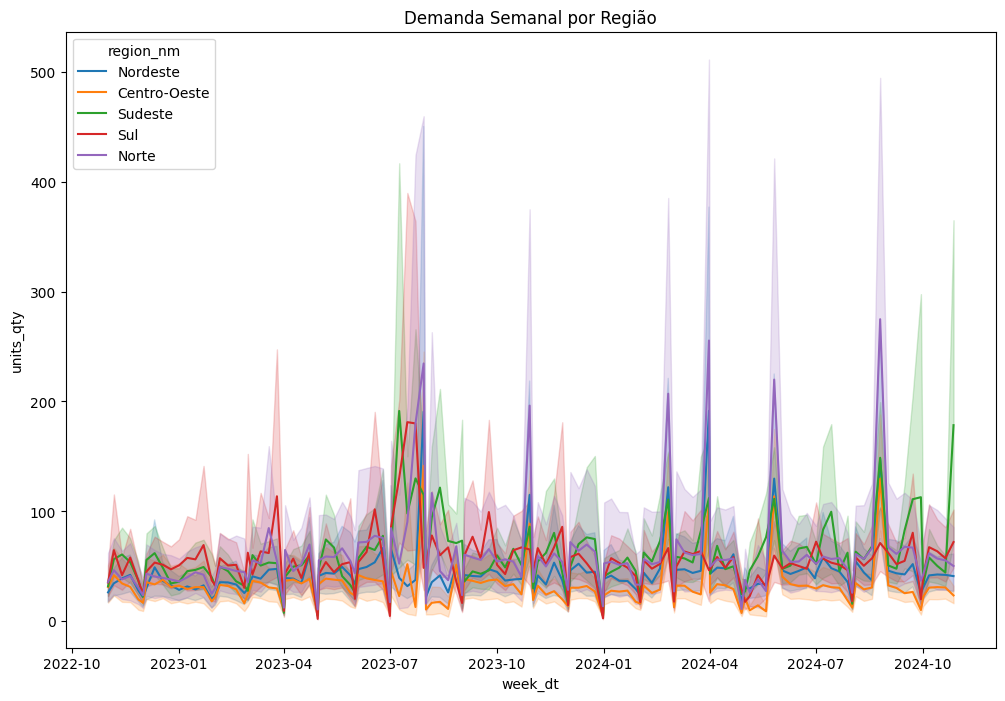

In [12]:
plt.figure(figsize=(12,8))
sns.lineplot(x='week_dt', y='units_qty', hue='region_nm', data=df)
plt.title("Demanda Semanal por Região")
plt.show()

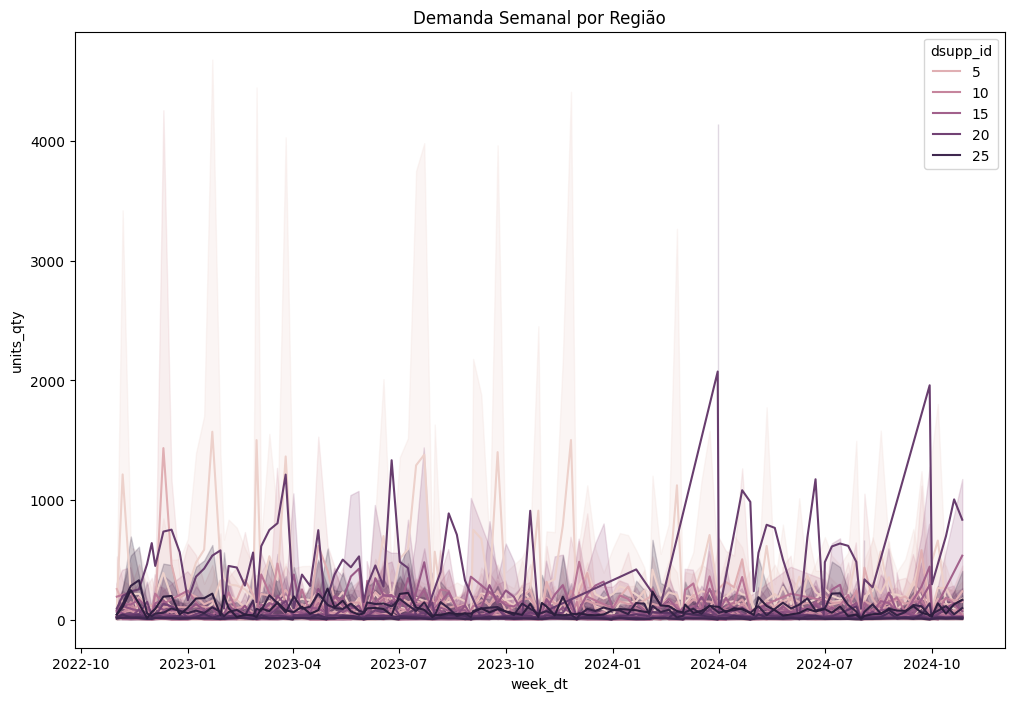

In [13]:
plt.figure(figsize=(12,8))
sns.lineplot(x='week_dt', y='units_qty', hue='dsupp_id', data=df)
plt.title("Demanda Semanal por Região")
plt.show()

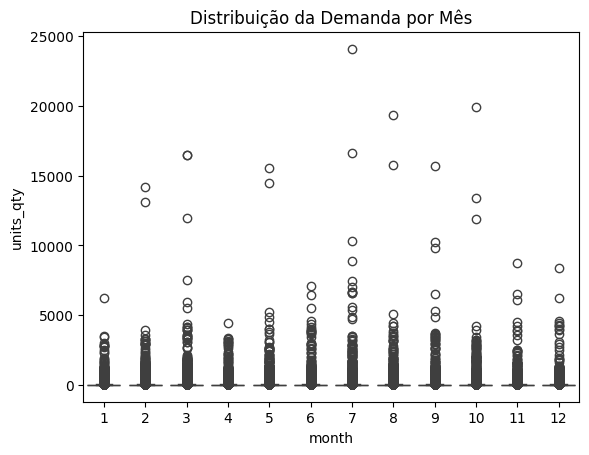

In [14]:
df['month'] = df['week_dt'].dt.month
sns.boxplot(x='month', y='units_qty', data=df)
plt.title('Distribuição da Demanda por Mês')
plt.show()

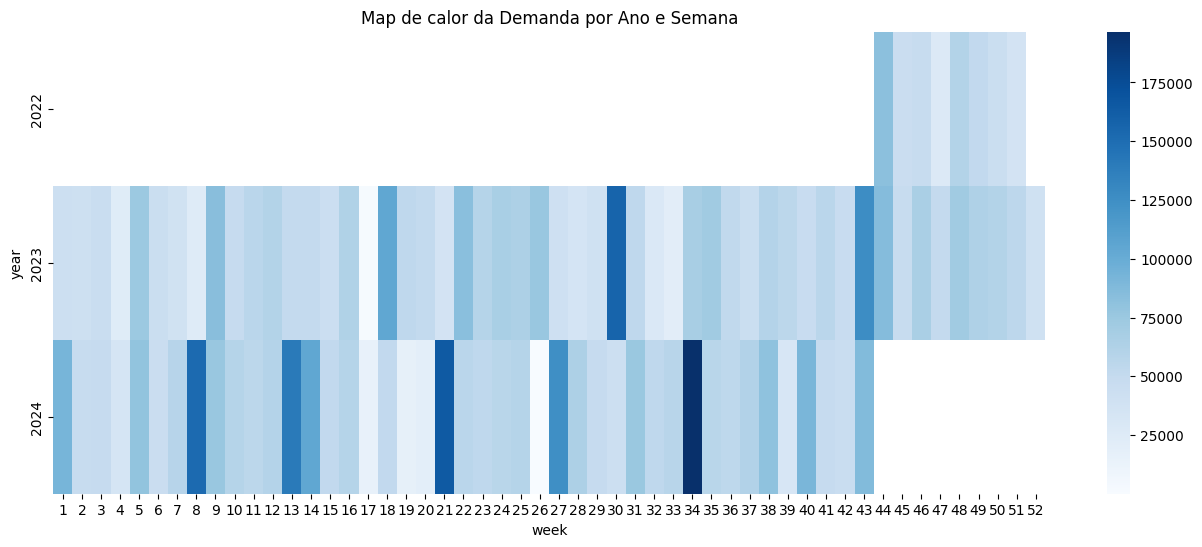

In [15]:
df['year'] = df['week_dt'].dt.year
df['week'] = df['week_dt'].dt.isocalendar().week
pivot = df.pivot_table(values='units_qty', index='year', columns='week', aggfunc='sum')

plt.figure(figsize=(16, 6))
sns.heatmap(pivot, cmap='Blues', annot=False)
plt.title("Map de calor da Demanda por Ano e Semana")
plt.show()

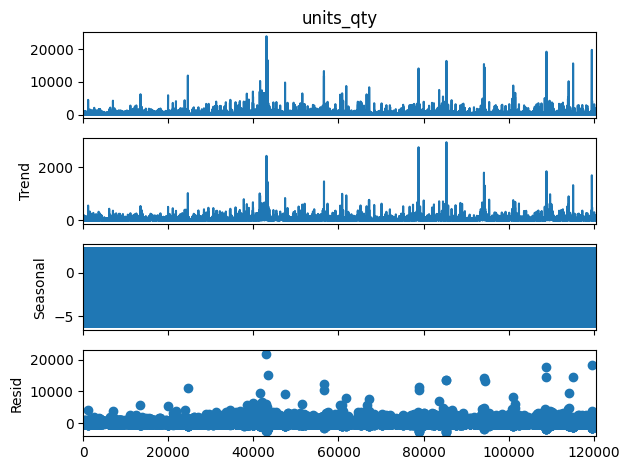

In [16]:
decomp = seasonal_decompose(df['units_qty'], model='additive', period=12)
decomp.plot()
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['units_qty'], autolag='AIC')

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1]<=0.05:
    print("Rejeita Hipótese Nula, é uma série estacionária")
else:
    print("Não rejeita hipótese nula, não é uma série estacionária") 

ADF Statistic: -34.6173803811398
p-value: 0.0
Rejeita Hipótese Nula, é uma série estacionária


---

# Conclusão

- Podemos levar em consideração que o maior números de demanadas se deve as regiões do `Nordeste` e `Sudeste`.
- Há presença de outliers na maior parde em regiões de `Nordeste`, `Sudeste` e `Norte`, o que pode indiciar certos eventos exclusivos que pode ocorrer nessas regiões (promoção, surto de doença).
- O distribuidor `6` possui o maior número de demandas
- Há também presença de outliers em algumas categorias dos produtos, o que indica que existem certos atributos com maior demanada
---
- No gráfico da `Demanda Semanal`:
    - não há uma tendência clara de alta 
    - Há picos a cada 2-3 meses, que pode representar uma sazonalidade
    - Esses picos podem estar associados a ciclos promocionais, datas sazonais do setor farmacêutico (ex: campanhas de vacinação, início de inverno/verão), ou renovação de estoque dos distribuidores.
    - Existência de outliers, acima de 150.
    - Apesar de um tendência não muita clara, visualmente não apresenta uma série estacionaria
---
- No gráfico `Decompose`:
    - O padrão é altamente variável, o que indica que não há uma tendência forte e estável de crescimento ou queda. A variação é mais influenciada por eventos pontuais do que por uma evolução constante.
    - Não foi detectado um padrão sazonal significativo com o período utilizado.
---
- No teste `ADF`:
    - ADF = -33.33, valor altamente negativo.
    - p-value = 0.0, ou seja, muito abaixo do limiar de 0.05.

---

# Feature Engineering
- Agrupamento por `week_dt`, `dsupp_id`, `region_nm`, `product_attr_1`, `product_attr_2` e `product_attr_3`
- Adicionando colunas temporais, lag features e rolling means

In [18]:
# Remoção do product_id, será utilizado apenas os atributos dos produtos como informações.
df.drop('product_id', axis=1, inplace=True)

In [19]:
df = df.groupby(['week_dt', 'dsupp_id', 'region_nm', 'product_attr_1', 'product_attr_2', 'product_attr_3'])['units_qty'].sum().reset_index()

In [20]:
df['month'] = df['week_dt'].dt.month
df['year'] = df['week_dt'].dt.year
df['week'] = df['week_dt'].dt.isocalendar().week.astype(int)

# Eventos Sazonais
# Carnaval
df['is_carnival_week'] = df['month'].isin([2]).astype(int)

# Inverno
df['is_winter'] = df['month'].isin([6, 7, 8]).astype(int)

# Verão (promoções em dezembro/janeiro)
df['is_summer'] = df['month'].isin([12, 1]).astype(int)

# Defasagem
for lag in [1, 2, 3, 4, 5, 6, 12]:
    df[f'lag_{lag}'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(lag)
    
# Média Móvel
df['rolling_mean_3'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=3).mean()
df['rolling_mean_6'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=6).mean()
df['rolling_mean_9'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=9).mean()

# Desvio padrão móvel
df['rolling_std_3'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=3).std()
df['rolling_std_6'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=6).std()
df['rolling_std_9'] = df.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=9).std()

df = df.dropna()

# Pré-processamento

In [21]:
np.unique(df['region_nm'])

array(['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul'],
      dtype=object)

In [22]:
np.unique(df['dsupp_id'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64)

In [23]:
np.unique(df['product_attr_1'])

array(['A', 'B', 'C'], dtype=object)

In [24]:
np.unique(df['product_attr_2'])

array(['A', 'B', 'C'], dtype=object)

In [25]:
np.unique(df['product_attr_3'])

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A09', 'A10',
       'A11', 'A12', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07',
       'B08', 'B09', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16',
       'B17', 'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25',
       'B26', 'B27', 'B28', 'B29', 'B30', 'B31', 'B32'], dtype=object)

In [26]:
df = pd.get_dummies(data=df, columns=['region_nm', 'dsupp_id', 'product_attr_1', 'product_attr_2', 'product_attr_3'], dtype=int)

---

# Selection Features

In [27]:
from sklearn.ensemble import ExtraTreesRegressor

# Remoção do week_dt, as features temporais que adicionamos já estabalece o vínculo com week_dt 
X = df.drop(columns=['units_qty', 'week_dt']).values
columns = df.drop(columns=['units_qty', 'week_dt']).columns
y = df['units_qty'].values

selection_features = ExtraTreesRegressor(random_state=42)
selection_features.fit(X, y)

ExtraTreesRegressor(random_state=42)

In [28]:
importances = selection_features.feature_importances_
index = []

for i in range(len(importances)):
    if importances[i] >= 0.05:
        index.append(i)

columns[index]

Index(['lag_5', 'rolling_std_6', 'dsupp_id_6'], dtype='object')

- Os `product_attr_*` não mostraram nenhuma importância em relação ao target, e para evitar uma maior complexidade computacional iremos remover todos os atributos
- O `dsupp` e `region` será usado apenas para filtragem e será removido.

---

# Modelo - Previsão de demanda geral
Após a seleção de features e a criação de algumas delas, já podemos definir o dataset. Será feito:
- Agrupado por `dsupp_id` com a somatória de `units_qty` para um modelo de previsão de demanda no Brasil

In [29]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
import numpy as np

In [30]:
df = pd.read_csv('Data/dataset-case-iqvia.csv')

In [31]:
def prepare_df_geral(df):

    df_filtered = df.copy()

    df_filtered['week_dt'] = pd.to_datetime(df_filtered['week_dt'])
    
    df_filtered = df_filtered.groupby(['week_dt'], as_index=False)['units_qty'].sum()
    
    df_filtered['month'] = df_filtered['week_dt'].dt.month
    df_filtered['year'] = df_filtered['week_dt'].dt.year
    df_filtered['week'] = df_filtered['week_dt'].dt.isocalendar().week.astype(int)
    
    for lag in [1, 2, 3, 4, 5, 6, 12]:
        df_filtered[f'lag_{lag}'] = df_filtered['units_qty'].shift(lag)
    
    df_filtered['rolling_mean_3'] = df_filtered['units_qty'].shift(1).rolling(window=3).mean()
    df_filtered['rolling_mean_6'] = df_filtered['units_qty'].shift(1).rolling(window=6).mean()
    df_filtered['rolling_std_3'] = df_filtered['units_qty'].shift(1).rolling(window=3).std()
    df_filtered['rolling_std_6'] = df_filtered['units_qty'].shift(1).rolling(window=6).std()
    
    df_filtered = df_filtered.dropna().reset_index(drop=True)
    
    df_filtered = df_filtered.sort_values(by=['week_dt'])
    
    return df_filtered

In [32]:
df_filtered = prepare_df_geral(df)

## Modelo - Previsão de demanda geral - Validação Cruazada

In [33]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

X = df_filtered.drop(columns=['units_qty', 'week_dt'])
y = df_filtered['units_qty']

time_split = TimeSeriesSplit(n_splits=3)

results = []

for name, model in models.items():
    print(f"Treinando modelo: {name}")
    model_mse = []
    model_r2 = []
    model_mae = []

    for train_idx, test_idx in time_split.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mse = mean_squared_error(y_test, pred)
        r2 = r2_score(y_test, pred)
        mae = mean_absolute_error(y_test, pred)
        model_mse.append(mse)
        model_r2.append(r2)
        model_mae.append(mae)
    
    results.append({
        'Model': name,
        'Média MSE': np.mean(model_mse),
        'Média R2': np.mean(model_r2),
        'Média MAE': np.mean(model_mae)
    })
    
    print(f"{name} - MSE médio: {np.mean(model_mse):.2f} | R2 médio: {np.mean(model_r2):.2f} | MAE médio: {np.mean(model_mae):.2f}")

metrics_df = pd.DataFrame(results)

Treinando modelo: Random Forest
Random Forest - MSE médio: 1222804928.30 | R2 médio: -0.09 | MAE médio: 21028.13
Treinando modelo: Gradient Boosting
Gradient Boosting - MSE médio: 1383630502.52 | R2 médio: -0.23 | MAE médio: 23519.93
Treinando modelo: LightGBM
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 28, number of used features: 0
[LightGBM] [Info] Start training from score 43278.434980
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped tra

In [34]:
metrics_df

,Model,Média MSE,Média R2,Média MAE
0,Random Forest,1.222805e+09,-0.089198,21028.128807
1,Gradient Boosting,1.383631e+09,-0.226376,23519.926836
2,LightGBM,1.266023e+09,-0.133514,22831.981196
3,XGBoost,1.442927e+09,-0.316196,24858.733682


In [35]:
df_filtered.describe()['units_qty']

count       112.000000
mean      51398.983384
min          39.000000
25%       36109.410000
50%       50085.375000
75%       59147.310000
max      196569.800000
std       30837.292696
Name: units_qty, dtype: float64

## Modelo - Previsão de demanda geral - Tuning

In [36]:
X = df_filtered.drop(columns=['units_qty', 'week_dt'])
y = df_filtered['units_qty']

time_split = TimeSeriesSplit(n_splits=5)

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

rfr = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=time_split,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X, y)
best_model = grid_search.best_estimator_

print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

model_mse, model_mae, model_r2 = [], [], []
all_y_test, all_y_pred = [], []

all_dates = []

for train_idx, test_idx in time_split.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    week_dt_test = pd.to_datetime(df_filtered.iloc[test_idx]['week_dt']).tolist()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    best_model.fit(X_train_scaled, y_train)
    y_pred = best_model.predict(X_test_scaled)

    model_mse.append(mean_squared_error(y_test, y_pred))
    model_mae.append(mean_absolute_error(y_test, y_pred))
    model_r2.append(r2_score(y_test, y_pred))

    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)
    all_dates.extend(week_dt_test)

print("Métricas finais:")
print(f"Média MSE: {np.mean(model_mse):.2f}")
print(f"Média MAE: {np.mean(model_mae):.2f}")
print(f"Média R² : {np.mean(model_r2):.2f}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Melhores hiperparâmetros encontrados:
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Métricas finais:
Média MSE: 1137121044.52
Média MAE: 20093.95
Média R² : -0.05


## Modelo - Previsão de demanda geral - Comparação Real vs Previsão

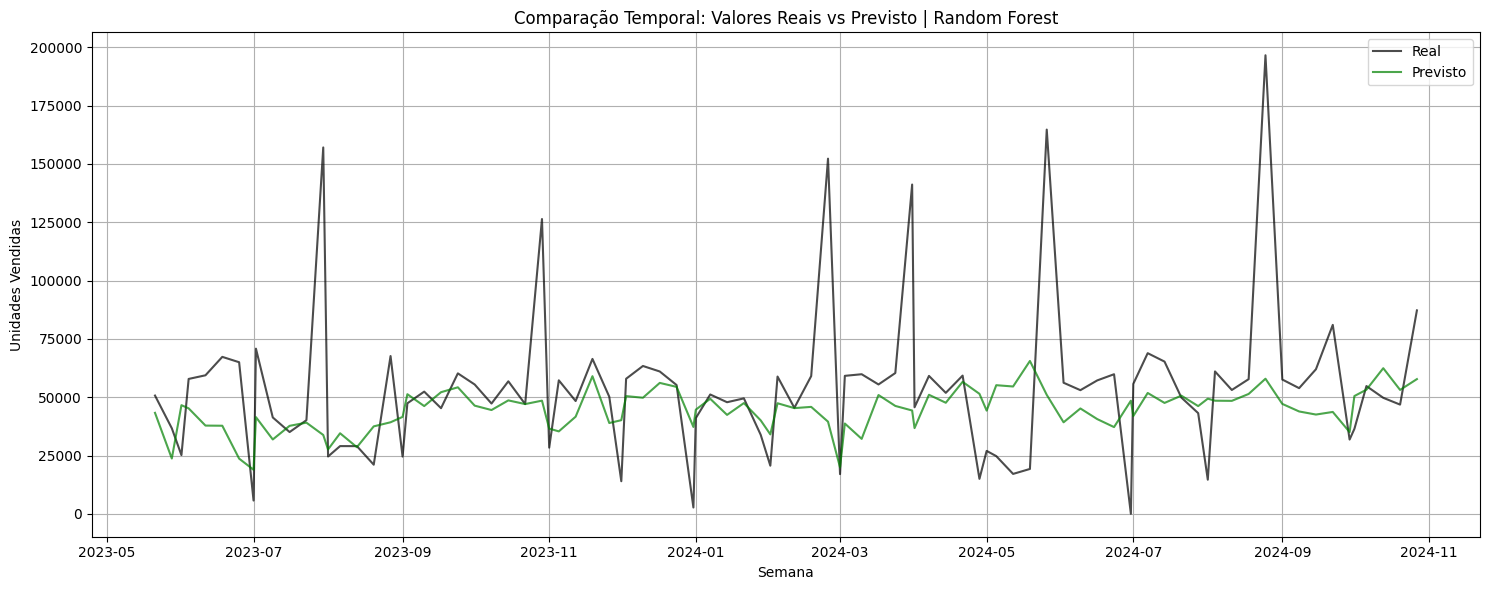

In [37]:
result_df = pd.DataFrame({
    'week_dt': pd.to_datetime(all_dates),
    'y_real': all_y_test,
    'y_pred': all_y_pred
}).sort_values('week_dt')

# Plotando os resultados
plt.figure(figsize=(15, 6))
plt.plot(result_df['week_dt'], result_df['y_real'], label='Real', color='black', alpha=0.7)
plt.plot(result_df['week_dt'], result_df['y_pred'], label='Previsto', color='green', alpha=0.7)
plt.title('Comparação Temporal: Valores Reais vs Previsto | Random Forest')
plt.xlabel('Semana')
plt.ylabel('Unidades Vendidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

# Modelo - Previsão de demanda por Região e Distribuidor
- Agrupado por `week_dt`, `region_nm` e `dsupp_id` com a somatória de `units_qty` para um modelo de previsão de demanda por região e distribuidor

In [38]:
df = pd.read_csv('Data/dataset-case-iqvia.csv')

In [39]:
def prepare_filtered_data(df, region_val, dsupp_id_val):
    df_filtered = df[(df['region_nm'] == region_val) & (df['dsupp_id'] == dsupp_id_val)].copy()
    
    df_filtered['week_dt'] = pd.to_datetime(df_filtered['week_dt'])
    
    df_filtered = df_filtered.groupby(['week_dt', 'region_nm', 'dsupp_id'], as_index=False)['units_qty'].sum()
    
    df_filtered['month'] = df_filtered['week_dt'].dt.month
    df_filtered['year'] = df_filtered['week_dt'].dt.year
    df_filtered['week'] = df_filtered['week_dt'].dt.isocalendar().week.astype(int)
    
    for lag in [1, 2, 3, 4, 5, 6]:
        df_filtered[f'lag_{lag}'] = df_filtered.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(lag)
    
    df_filtered['rolling_mean_3'] = df_filtered.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=3).mean()
    df_filtered['rolling_mean_6'] = df_filtered.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=6).mean()
    df_filtered['rolling_std_3'] = df_filtered.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=3).std()
    df_filtered['rolling_std_6'] = df_filtered.groupby(['dsupp_id', 'region_nm'])['units_qty'].shift(1).rolling(window=6).std()
    
    df_filtered = df_filtered.dropna().reset_index(drop=True)
    
    df_filtered = df_filtered.sort_values(by=['week_dt'])

    return df_filtered

In [40]:
df_filtered = prepare_filtered_data(df, "Sul", 1)

In [41]:
df_filtered.head()

,week_dt,region_nm,dsupp_id,units_qty,month,year,week,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean_3,rolling_mean_6,rolling_std_3,rolling_std_6
0,2022-12-04,Sul,1,784.0,12,2022,48,265.0,520.0,1083.0,854.0,4854.0,604.0,622.666667,1363.333333,418.552665,1733.025986
1,2022-12-11,Sul,1,1950.0,12,2022,49,784.0,265.0,520.0,1083.0,854.0,4854.0,523.000000,1393.333333,259.513005,1718.751601
2,2022-12-18,Sul,1,1116.0,12,2022,50,1950.0,784.0,265.0,520.0,1083.0,854.0,999.666667,909.333333,862.954421,582.865908
3,2022-12-25,Sul,1,937.0,12,2022,51,1116.0,1950.0,784.0,265.0,520.0,1083.0,1283.333333,953.000000,600.740654,587.685630
4,2023-01-01,Sul,1,1301.0,1,2023,52,937.0,1116.0,1950.0,784.0,265.0,520.0,1334.333333,928.666667,540.642519,584.238878


## Modelo - Previsão de demanda por Região e Distribuidor - Validação Cruzada

In [42]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

In [43]:
X = df_filtered.drop(columns=['units_qty', 'week_dt', 'region_nm', 'dsupp_id'])
y = df_filtered['units_qty']

time_split = TimeSeriesSplit(n_splits=3)

In [44]:
results = []

for name, model in models.items():
    print(f"Treinando modelo: {name}")
    model_mse = []
    model_r2 = []
    model_mae = []

    for train_idx, test_idx in time_split.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mse = mean_squared_error(y_test, pred)
        r2 = r2_score(y_test, pred)
        mae = mean_absolute_error(y_test, pred)
        model_mse.append(mse)
        model_r2.append(r2)
        model_mae.append(mae)
    
    results.append({
        'Model': name,
        'Média MSE': np.mean(model_mse),
        'Média R2': np.mean(model_r2),
        'Média MAE': np.mean(model_mae)
    })
    
    print(f"{name} - MSE médio: {np.mean(model_mse):.2f} | R2 médio: {np.mean(model_r2):.2f} | MAE médio: {np.mean(model_mae):.2f}")

metrics_df = pd.DataFrame(results)

Treinando modelo: Random Forest
Random Forest - MSE médio: 3386317.18 | R2 médio: -0.58 | MAE médio: 1378.96
Treinando modelo: Gradient Boosting
Gradient Boosting - MSE médio: 4209283.78 | R2 médio: -0.79 | MAE médio: 1525.98
Treinando modelo: LightGBM
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 28, number of used features: 0
[LightGBM] [Info] Start training from score 2080.285714
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training bec

In [45]:
metrics_df

,Model,Média MSE,Média R2,Média MAE
0,Random Forest,3.386317e+06,-0.575565,1378.963214
1,Gradient Boosting,4.209284e+06,-0.790910,1525.978987
2,LightGBM,3.392148e+06,-0.841633,1435.253061
3,XGBoost,4.988595e+06,-1.378144,1542.791605


In [46]:
df_filtered.describe()['units_qty']

count      112.000000
mean      1750.866071
min         23.000000
25%        641.750000
50%       1138.500000
75%       1959.750000
max      12273.000000
std       1964.977530
Name: units_qty, dtype: float64

- Comparando a média de `units_qty`, o modelo `Random Forest` entregou uma melhor perfomance, apresentando um erro de aproximadamente 45% comparado a média.

## Modelo - Previsão de demanda por Região e Distribuidor - Tuning

In [47]:
X = df_filtered.drop(columns=['units_qty', 'week_dt', 'region_nm', 'dsupp_id'])
y = df_filtered['units_qty']

time_split = TimeSeriesSplit(n_splits=5)

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

rfr = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rfr,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=time_split,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X, y)
best_model = grid_search.best_estimator_

print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

model_mse, model_mae, model_r2 = [], [], []
all_y_test, all_y_pred = [], []

all_dates = []

for train_idx, test_idx in time_split.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    week_dt_test = pd.to_datetime(df_filtered.iloc[test_idx]['week_dt']).tolist()

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    best_model.fit(X_train_scaled, y_train)
    y_pred = best_model.predict(X_test_scaled)

    model_mse.append(mean_squared_error(y_test, y_pred))
    model_mae.append(mean_absolute_error(y_test, y_pred))
    model_r2.append(r2_score(y_test, y_pred))

    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)
    all_dates.extend(week_dt_test)

print(f"Média MSE: {np.mean(model_mse):.2f}")
print(f"Média MAE: {np.mean(model_mae):.2f}")
print(f"Média R² : {np.mean(model_r2):.2f}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Melhores hiperparâmetros encontrados:
{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
Média MSE: 3246814.01
Média MAE: 1419.97
Média R² : -1.33


## Modelo - Previsão de demanda por Região e Distribuidor - Comparação Real vs Previsão

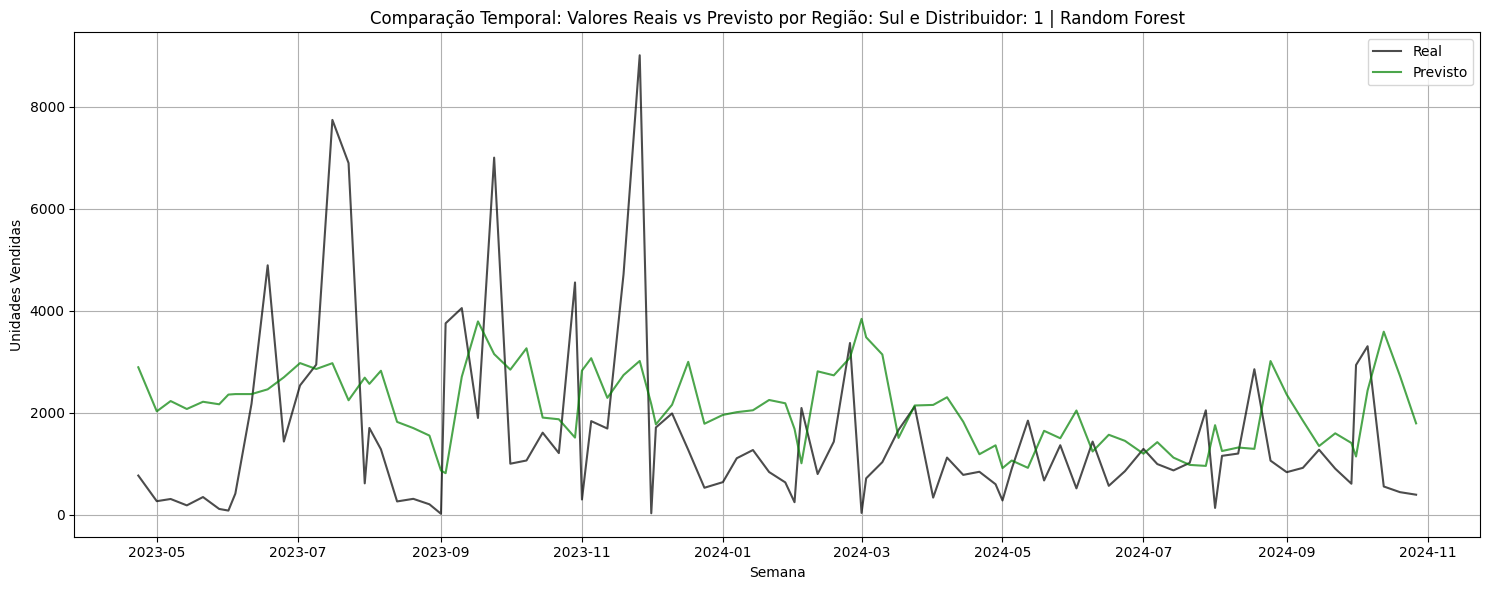

In [48]:
result_df = pd.DataFrame({
    'week_dt': pd.to_datetime(all_dates),
    'y_real': all_y_test,
    'y_pred': all_y_pred
}).sort_values('week_dt')

plt.figure(figsize=(15, 6))
plt.plot(result_df['week_dt'], result_df['y_real'], label='Real', color='black', alpha=0.7)
plt.plot(result_df['week_dt'], result_df['y_pred'], label='Previsto', color='green', alpha=0.7)
plt.title('Comparação Temporal: Valores Reais vs Previsto por Região: Sul e Distribuidor: 1 | Random Forest')
plt.xlabel('Semana')
plt.ylabel('Unidades Vendidas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

# Fontes de Apoio

- [Time Series Plot](https://www.mathworks.com/help/matlab/ref/timeseries.plot.html)
- [Seasonal Decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)
- [Preprocessing Time Series](https://www.nousot.com/resources/preprocessing-for-time-series/)
- [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html)